In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('Loan_data.csv')

In [3]:
df.columns

Index(['OBS.', 'CHK_ACCT', 'DURATION', 'HISTORY', 'CAR', 'FURNITURE',
       'RADIO.TV', 'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT',
       'EMPLOYMENT', 'INSTALL_RATE', 'MaritalStatus', 'CO.APPLICANT',
       'GUARANTOR', 'PRESENT_RESIDENT', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE',
       'OTHER_INSTALL', 'RENT', 'OWN_RES', 'NUM_CREDITS', 'JOB',
       'NUM_DEPENDENTS', 'TELEPHONE', 'FOREIGN', 'DEFAULT'],
      dtype='object')

In [4]:
df.head()

,OBS.,CHK_ACCT,DURATION,HISTORY,CAR,FURNITURE,RADIO.TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,1,0,6.0,4,UsedCar,0,1,0,0,1169.0,...,67.0,0,0,1,2,2,1,1,0,1
1,2,1,48.0,2,UsedCar,0,1,0,0,5951.0,...,22.0,0,0,1,1,2,1,0,0,0
2,3,3,12.0,4,UsedCar,0,0,1,0,2096.0,...,49.0,0,0,1,1,1,2,0,0,1
3,4,0,42.0,2,UsedCar,1,0,0,0,7882.0,...,45.0,0,0,0,1,2,2,0,0,1
4,5,0,24.0,3,NewCar,0,0,0,0,4870.0,...,53.0,0,0,0,2,2,2,0,0,0


In [5]:
df['DEFAULT'].value_counts()

1    700
0    300
Name: DEFAULT, dtype: int64

In [6]:
df['New_DEFAULT'] = 1 - df['DEFAULT']

In [7]:
df

,OBS.,CHK_ACCT,DURATION,HISTORY,CAR,FURNITURE,RADIO.TV,EDUCATION,RETRAINING,AMOUNT,...,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT,New_DEFAULT
0,1,0,6.0,4,UsedCar,0,1,0,0,1169.0,...,0,0,1,2,2,1,1,0,1,0
1,2,1,48.0,2,UsedCar,0,1,0,0,5951.0,...,0,0,1,1,2,1,0,0,0,1
2,3,3,12.0,4,UsedCar,0,0,1,0,2096.0,...,0,0,1,1,1,2,0,0,1,0
3,4,0,42.0,2,UsedCar,1,0,0,0,7882.0,...,0,0,0,1,2,2,0,0,1,0
4,5,0,24.0,3,NewCar,0,0,0,0,4870.0,...,0,0,0,2,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,12.0,2,UsedCar,1,0,0,0,1736.0,...,0,0,1,1,1,1,0,0,1,0
996,997,0,30.0,2,UsedCar,0,0,0,0,3857.0,...,0,0,1,1,3,1,1,0,1,0
997,998,3,12.0,2,UsedCar,0,1,0,0,804.0,...,0,0,1,1,2,1,0,0,1,0
998,999,0,45.0,2,UsedCar,0,1,0,0,1845.0,...,0,0,0,1,2,1,1,0,0,1


In [8]:
df['New_DEFAULT'].value_counts()
# Minority class is New_DEFAULT = 1

0    700
1    300
Name: New_DEFAULT, dtype: int64

<AxesSubplot:>

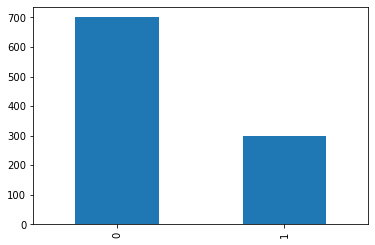

In [9]:
df['New_DEFAULT'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='New_DEFAULT,OWN_RES'>

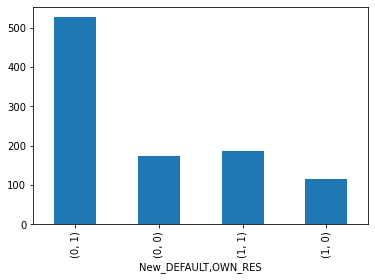

In [10]:
df.groupby('New_DEFAULT')['OWN_RES'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='New_DEFAULT,EDUCATION'>

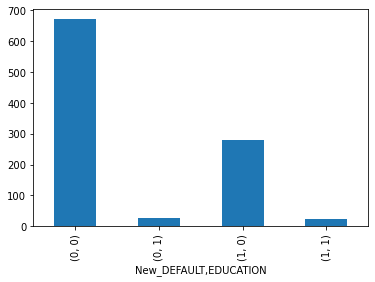

In [11]:
df.groupby('New_DEFAULT')['EDUCATION'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='New_DEFAULT,NUM_DEPENDENTS'>

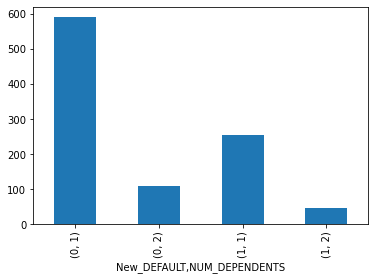

In [12]:
df.groupby('New_DEFAULT')['NUM_DEPENDENTS'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='New_DEFAULT,NUM_DEPENDENTS'>

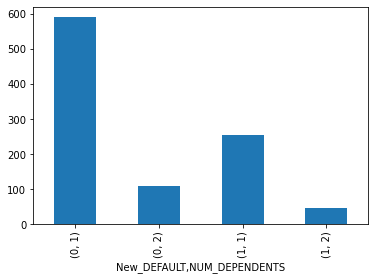

In [13]:
df.groupby('New_DEFAULT')['NUM_DEPENDENTS'].value_counts().plot(kind = 'bar')

In [14]:
df.isnull().sum()

OBS.                0
CHK_ACCT            0
DURATION            3
HISTORY             0
CAR                 3
FURNITURE           0
RADIO.TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              4
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MaritalStatus       4
CO.APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 2
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
DEFAULT             0
New_DEFAULT         0
dtype: int64

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='New_DEFAULT', ylabel='AGE'>

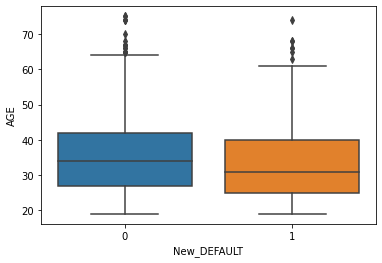

In [15]:
sns.boxplot(df['New_DEFAULT'], df['AGE'])

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='New_DEFAULT', ylabel='AMOUNT'>

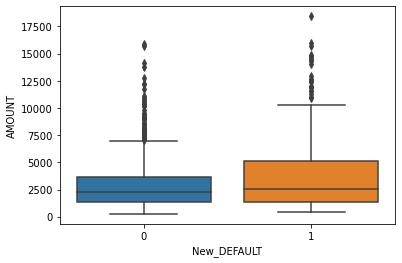

In [16]:
sns.boxplot(df['New_DEFAULT'], df['AMOUNT'])

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='New_DEFAULT', ylabel='DURATION'>

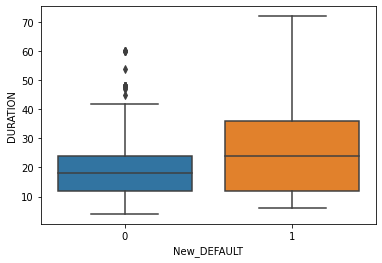

In [17]:

sns.boxplot(df['New_DEFAULT'], df['DURATION'])

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='New_DEFAULT', ylabel='EMPLOYMENT'>

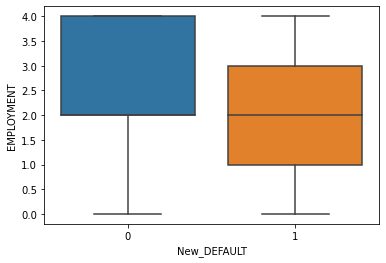

In [18]:
sns.boxplot(df['New_DEFAULT'], df['EMPLOYMENT'])

<AxesSubplot:>

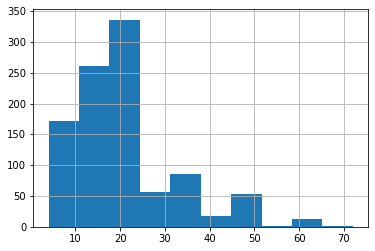

In [19]:
df['DURATION'].hist()

In [20]:
df['DURATION'] = df['DURATION'].fillna(df['DURATION'].median())

In [21]:
df['CAR'].value_counts()

UsedCar    765
NewCar     232
Name: CAR, dtype: int64

In [22]:
df['CAR'] = df['CAR'].fillna(df['CAR'].mode()[0])

<AxesSubplot:>

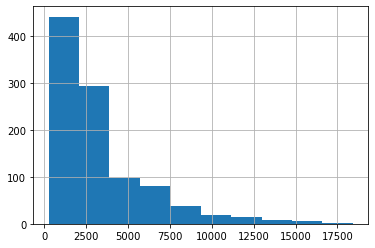

In [23]:
df['AMOUNT'].hist()

In [24]:
df['AMOUNT'] = df['AMOUNT'].fillna(df['AMOUNT'].median())

In [25]:
df['MaritalStatus'] = df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])

<AxesSubplot:>

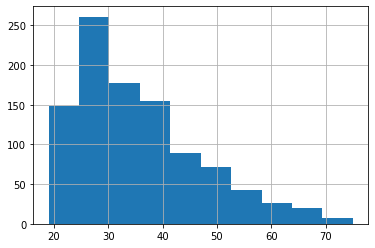

In [26]:
df['AGE'].hist()

In [27]:
df['AGE'] = df['AGE'].fillna(df['AGE'].median())

In [28]:
df.isnull().sum()

OBS.                0
CHK_ACCT            0
DURATION            0
HISTORY             0
CAR                 0
FURNITURE           0
RADIO.TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MaritalStatus       0
CO.APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
DEFAULT             0
New_DEFAULT         0
dtype: int64

In [29]:
df.dtypes

OBS.                  int64
CHK_ACCT              int64
DURATION            float64
HISTORY               int64
CAR                  object
FURNITURE             int64
RADIO.TV              int64
EDUCATION             int64
RETRAINING            int64
AMOUNT              float64
SAV_ACCT              int64
EMPLOYMENT            int64
INSTALL_RATE          int64
MaritalStatus        object
CO.APPLICANT          int64
GUARANTOR             int64
PRESENT_RESIDENT      int64
REAL_ESTATE           int64
PROP_UNKN_NONE        int64
AGE                 float64
OTHER_INSTALL         int64
RENT                  int64
OWN_RES               int64
NUM_CREDITS           int64
JOB                   int64
NUM_DEPENDENTS        int64
TELEPHONE             int64
FOREIGN               int64
DEFAULT               int64
New_DEFAULT           int64
dtype: object

In [30]:
df_dummies_maritalStatus = pd.get_dummies(df,columns=['MaritalStatus'])

In [31]:
df_dummies = pd.get_dummies(df_dummies_maritalStatus,columns=['CAR'])

In [32]:
df = df_dummies

In [33]:
df.dtypes

OBS.                        int64
CHK_ACCT                    int64
DURATION                  float64
HISTORY                     int64
FURNITURE                   int64
RADIO.TV                    int64
EDUCATION                   int64
RETRAINING                  int64
AMOUNT                    float64
SAV_ACCT                    int64
EMPLOYMENT                  int64
INSTALL_RATE                int64
CO.APPLICANT                int64
GUARANTOR                   int64
PRESENT_RESIDENT            int64
REAL_ESTATE                 int64
PROP_UNKN_NONE              int64
AGE                       float64
OTHER_INSTALL               int64
RENT                        int64
OWN_RES                     int64
NUM_CREDITS                 int64
JOB                         int64
NUM_DEPENDENTS              int64
TELEPHONE                   int64
FOREIGN                     int64
DEFAULT                     int64
New_DEFAULT                 int64
MaritalStatus_Married       uint8
MaritalStatus_

In [34]:
df.head()

,OBS.,CHK_ACCT,DURATION,HISTORY,FURNITURE,RADIO.TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,...,TELEPHONE,FOREIGN,DEFAULT,New_DEFAULT,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widower,MaritalStatus_divorcee,CAR_NewCar,CAR_UsedCar
0,1,0,6.0,4,0,1,0,0,1169.0,4,...,1,0,1,0,0,0,1,0,0,1
1,2,1,48.0,2,0,1,0,0,5951.0,0,...,0,0,0,1,0,1,0,0,0,1
2,3,3,12.0,4,0,0,1,0,2096.0,0,...,0,0,1,0,0,1,0,0,0,1
3,4,0,42.0,2,1,0,0,0,7882.0,0,...,0,0,1,0,0,1,0,0,0,1
4,5,0,24.0,3,0,0,0,0,4870.0,0,...,0,0,0,1,0,1,0,0,1,0


In [35]:
df.columns

Index(['OBS.', 'CHK_ACCT', 'DURATION', 'HISTORY', 'FURNITURE', 'RADIO.TV',
       'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT', 'EMPLOYMENT',
       'INSTALL_RATE', 'CO.APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT',
       'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE',
       'FOREIGN', 'DEFAULT', 'New_DEFAULT', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widower',
       'MaritalStatus_divorcee', 'CAR_NewCar', 'CAR_UsedCar'],
      dtype='object')

In [36]:
df = df.drop(['OBS.'],axis=1)

In [37]:
df.columns

Index(['CHK_ACCT', 'DURATION', 'HISTORY', 'FURNITURE', 'RADIO.TV', 'EDUCATION',
       'RETRAINING', 'AMOUNT', 'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE',
       'CO.APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT', 'REAL_ESTATE',
       'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT', 'OWN_RES',
       'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE', 'FOREIGN',
       'DEFAULT', 'New_DEFAULT', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widower',
       'MaritalStatus_divorcee', 'CAR_NewCar', 'CAR_UsedCar'],
      dtype='object')

<AxesSubplot:>

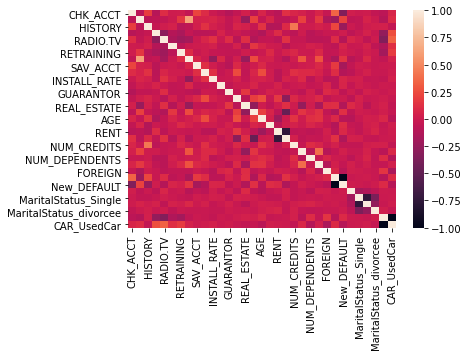

In [38]:
# find correlation between variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

In [39]:
abs(corr_matrix['New_DEFAULT']).sort_values(ascending=False)

DEFAULT                   1.000000e+00
New_DEFAULT               1.000000e+00
CHK_ACCT                  3.508475e-01
HISTORY                   2.287847e-01
DURATION                  2.128593e-01
SAV_ACCT                  1.789427e-01
AMOUNT                    1.548630e-01
OWN_RES                   1.345888e-01
PROP_UNKN_NONE            1.257500e-01
REAL_ESTATE               1.192995e-01
EMPLOYMENT                1.160020e-01
OTHER_INSTALL             1.132852e-01
RADIO.TV                  1.069222e-01
CAR_UsedCar               9.512257e-02
CAR_NewCar                9.512257e-02
RENT                      9.278545e-02
AGE                       8.985373e-02
FOREIGN                   8.207950e-02
INSTALL_RATE              7.240394e-02
EDUCATION                 7.008766e-02
CO.APPLICANT              6.272837e-02
GUARANTOR                 5.503925e-02
NUM_CREDITS               4.573249e-02
TELEPHONE                 3.646619e-02
RETRAINING                3.612906e-02
JOB                      

In [40]:
X = df[['CHK_ACCT', 'DURATION', 'HISTORY', 'FURNITURE', 'RADIO.TV', 'EDUCATION',
       'RETRAINING', 'AMOUNT', 'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE',
       'CO.APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT', 'REAL_ESTATE',
       'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT', 'OWN_RES',
       'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE', 'FOREIGN',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widower', 'MaritalStatus_divorcee', 'CAR_NewCar',
       'CAR_UsedCar']]
y = df['New_DEFAULT']

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=100)

In [42]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(800, 31)
(200, 31)
(800,)
(200,)


1. LOGISTIC REGRESSION

In [43]:
logReg = LogisticRegression()
logReg.fit(xtrain,ytrain)

C:\Users\srivi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
# Logistic Regression - test data scores:
predictions_test = logReg.predict(xtest)
print('LOG REG: Test data Scores: \n')
print(confusion_matrix(ytest,predictions_test))
print(classification_report(ytest,predictions_test))

LOG REG: Test data Scores: 

[[125  19]
 [ 27  29]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       144
           1       0.60      0.52      0.56        56

    accuracy                           0.77       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200



In [45]:
# Logistic Regression - train data scores:
predict_train = logReg.predict(xtrain)
print('LOG REG: Train data Scores: \n')
print(confusion_matrix(ytrain,predict_train))
print(classification_report(ytrain,predict_train))

LOG REG: Train data Scores: 

[[489  67]
 [113 131]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       556
           1       0.66      0.54      0.59       244

    accuracy                           0.78       800
   macro avg       0.74      0.71      0.72       800
weighted avg       0.77      0.78      0.77       800



2. DECISION TREE

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()   
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [47]:
predictions_test = dt.predict(xtest)
print('DECISION TREE - Default Hyperparameters: Test data scores: \n')
print(confusion_matrix(ytest,predictions_test))
print(classification_report(ytest,predictions_test))

DECISION TREE - Default Hyperparameters: Test data scores: 

[[117  27]
 [ 31  25]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       144
           1       0.48      0.45      0.46        56

    accuracy                           0.71       200
   macro avg       0.64      0.63      0.63       200
weighted avg       0.70      0.71      0.71       200



In [48]:
predictions_train = dt.predict(xtrain)
print('DECISION TREE - Default Hyperparameters: Train data scores: \n')
print(confusion_matrix(ytrain,predictions_train))
print(classification_report(ytrain,predictions_train))

DECISION TREE - Default Hyperparameters: Train data scores: 

[[556   0]
 [  0 244]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       244

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



DECISION TREE - WITH MAX_DEPTH = 5, CRITERIOR = ENTROPY

In [49]:
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy')   
dt.fit(xtrain,ytrain)
predictions_test = dt.predict(xtest)
print('DECISION TREE - max depth 5 and entropy: Test data scores: \n')
print(confusion_matrix(ytest,predictions_test))
print(classification_report(ytest,predictions_test))
predictions_train = dt.predict(xtrain)
print('DECISION TREE  max depth 5 and entropy: Train data scores: \n')
print(confusion_matrix(ytrain,predictions_train))
print(classification_report(ytrain,predictions_train))

DECISION TREE - max depth 5 and entropy: Test data scores: 

[[131  13]
 [ 37  19]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       144
           1       0.59      0.34      0.43        56

    accuracy                           0.75       200
   macro avg       0.69      0.62      0.64       200
weighted avg       0.73      0.75      0.73       200

DECISION TREE  max depth 5 and entropy: Train data scores: 

[[524  32]
 [154  90]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       556
           1       0.74      0.37      0.49       244

    accuracy                           0.77       800
   macro avg       0.76      0.66      0.67       800
weighted avg       0.76      0.77      0.74       800



3. RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [51]:
predictions_test = rf.predict(xtest)
print('RF - Default parameters: Test data scores: \n')
print(confusion_matrix(ytest,predictions_test))
print(classification_report(ytest,predictions_test))

RF - Default parameters: Test data scores: 

[[129  15]
 [ 34  22]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       144
           1       0.59      0.39      0.47        56

    accuracy                           0.76       200
   macro avg       0.69      0.64      0.66       200
weighted avg       0.74      0.76      0.74       200



In [52]:
predictions_train = rf.predict(xtrain)
print('RF - Default parameters: Train data scores: \n')
print(confusion_matrix(ytrain,predictions_train))
print(classification_report(ytrain,predictions_train))

RF - Default parameters: Train data scores: 

[[556   0]
 [  0 244]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       244

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



RANDOM FOREST - WITH N-ESTIMATORS 52

In [53]:
rf = RandomForestClassifier(random_state=100, n_estimators=52)
rf.fit(xtrain,ytrain)
predictions_test = rf.predict(xtest)
print('RF - Default parameters: Test data scores: \n')
print(confusion_matrix(ytest,predictions_test))
print(classification_report(ytest,predictions_test))
predictions_train = rf.predict(xtrain)
print('RF - Default parameters: Train data scores: \n')
print(confusion_matrix(ytrain,predictions_train))
print(classification_report(ytrain,predictions_train))

RF - Default parameters: Test data scores: 

[[134  10]
 [ 33  23]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       144
           1       0.70      0.41      0.52        56

    accuracy                           0.79       200
   macro avg       0.75      0.67      0.69       200
weighted avg       0.77      0.79      0.77       200

RF - Default parameters: Train data scores: 

[[556   0]
 [  0 244]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       244

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [54]:
#pip install xgboost

4. XGBOOST

In [55]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

In [56]:
xgb.fit(xtrain, ytrain)

[13:27:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\srivi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
predictions_test = xgb.predict(xtest)
print('XG Boost - Default parameters: test data scores: \n')
print(confusion_matrix(ytest,predictions_test))
print(classification_report(ytest,predictions_test))

XG Boost - Default parameters: test data scores: 

[[125  19]
 [ 30  26]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       144
           1       0.58      0.46      0.51        56

    accuracy                           0.76       200
   macro avg       0.69      0.67      0.68       200
weighted avg       0.74      0.76      0.75       200



In [58]:
predictions_train = xgb.predict(xtrain)
print('XG Boost - Default parameters: train data scores: \n')
print(confusion_matrix(ytrain,predictions_train))
print(classification_report(ytrain,predictions_train))

XG Boost - Default parameters: train data scores: 

[[556   0]
 [  0 244]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       244

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



SUMMARY:
Of all the models, RANDOM FOREST - WITH N-ESTIMATORS 52 has the highest accuracy score of 79% for test data.